In [1]:
#In this file Big Query zipcode tables data is cleaned and imputed appropriately
#A big task performed here is the build the acs features in line with the ZRI data
#which is provided monthly.  The ACS features are duplicated for the months and the data
#is pushed back by time t in years i.e. 3 would mean that ACS features from 3 years ago
#would be used (this code needs some more refactoring)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

In [2]:
zri_mf_clean=pd.read_csv("Phoenix_MF_ZRI.csv")

In [3]:
zri_mf_clean.isnull().any()

Unnamed: 0    False
RegionID      False
zipcode       False
City          False
State         False
Metro         False
CountyName    False
SizeRank      False
Period        False
ZRI           False
Year          False
Month         False
dtype: bool

In [4]:
#features should go back 3 years
t=3
phoenix_zipcodes = ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014")

In [5]:
%%bigquery acs_zip_codes_2011_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  8.72rows/s]


In [6]:
%%bigquery acs_zip_codes_2012_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  8.82rows/s]


In [7]:
%%bigquery acs_zip_codes_2013_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  8.76rows/s]


In [8]:
%%bigquery acs_zip_codes_2014_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  9.02rows/s]


In [9]:
%%bigquery acs_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:02<00:00,  8.25rows/s]


In [10]:
%%bigquery acs_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  8.90rows/s]


In [11]:
%%bigquery acs_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:02<00:00,  8.19rows/s]


In [12]:
%%bigquery acs_zip_codes_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ("85032", "85281", "85251", "85282", "85204", "85008", "85201", "85016", "85224",
       "85283", "85018", "85260", "85044", "85020", "85027", "85015", "85014");

Downloading: 100%|██████████| 17/17 [00:01<00:00,  9.31rows/s]


In [13]:
acs_zip_codes_2011_5yr["Year"]=2011
acs_zip_codes_2012_5yr["Year"]=2012
acs_zip_codes_2013_5yr["Year"]=2013
acs_zip_codes_2014_5yr["Year"]=2014
acs_zip_codes_2015_5yr["Year"]=2015
acs_zip_codes_2016_5yr["Year"]=2016
acs_zip_codes_2017_5yr["Year"]=2017

In [14]:
acs_cols_2011=acs_zip_codes_2011_5yr.columns
acs_cols_2012=acs_zip_codes_2012_5yr.columns
acs_cols_2013=acs_zip_codes_2013_5yr.columns
acs_cols_2014=acs_zip_codes_2014_5yr.columns
acs_cols_2015=acs_zip_codes_2015_5yr.columns
acs_cols_2016=acs_zip_codes_2016_5yr.columns
acs_cols_2017=acs_zip_codes_2017_5yr.columns

In [15]:
common_columns=list((((((set(acs_cols_2011).intersection
   (set(acs_cols_2012))).intersection
  (set(acs_cols_2013))).intersection
 (set(acs_cols_2014))).intersection
(set(acs_cols_2015))).intersection(set(acs_cols_2016))).intersection(set(acs_cols_2017)))

In [17]:
frames=[acs_zip_codes_2011_5yr[common_columns],
        acs_zip_codes_2012_5yr[common_columns],
        acs_zip_codes_2013_5yr[common_columns],
        acs_zip_codes_2014_5yr[common_columns],
        acs_zip_codes_2015_5yr[common_columns],
        acs_zip_codes_2016_5yr[common_columns],
        acs_zip_codes_2017_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [18]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(119, 247)

In [19]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
missingColsACS.sum()

11

In [20]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=len(phoenix_zipcodes)*2: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping speak_spanish_at_home from ACS
Dropping pop_5_years_over from ACS
Dropping speak_spanish_at_home_low_english from ACS
Dropping speak_only_english_at_home from ACS


In [21]:
#use this data to replace values missing in 2011
replacement_rows = acs_all_phoenix[acs_all_phoenix["Year"]==2012]

In [22]:
def impute_masters_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["masters_degree"].values[0]
def impute_pop_25_years_over(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["pop_25_years_over"].values[0]
def impute_associates_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["associates_degree"].values[0]
def impute_less_one_year_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["less_one_year_college"].values[0]
def impute_high_school_diploma(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["high_school_diploma"].values[0]
def impute_one_year_more_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["one_year_more_college"].values[0]
def impute_bachelors_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["bachelors_degree"].values[0]

In [23]:
missingrows = acs_all_phoenix['masters_degree'].isnull()
acs_all_phoenix.loc[missingrows,'masters_degree']=acs_all_phoenix[missingrows].apply(impute_masters_degree, axis=1)
acs_all_phoenix.loc[missingrows,'pop_25_years_over']=acs_all_phoenix[missingrows].apply(impute_pop_25_years_over, axis=1)
acs_all_phoenix.loc[missingrows,'associates_degree']=acs_all_phoenix[missingrows].apply(impute_associates_degree, axis=1)
acs_all_phoenix.loc[missingrows,'less_one_year_college']=acs_all_phoenix[missingrows].apply(impute_less_one_year_college, axis=1)
acs_all_phoenix.loc[missingrows,'high_school_diploma']=acs_all_phoenix[missingrows].apply(impute_high_school_diploma, axis=1)
acs_all_phoenix.loc[missingrows,'one_year_more_college']=acs_all_phoenix[missingrows].apply(impute_one_year_more_college, axis=1)
acs_all_phoenix.loc[missingrows,'bachelors_degree']=acs_all_phoenix[missingrows].apply(impute_bachelors_degree, axis=1)

In [24]:
#acs_all_phoenix.to_csv("ACS_Phoenix_Imputed.csv")

In [25]:
zri_mf_clean.shape

(1224, 12)

In [114]:
zri_mf_clean=zri_mf_clean.sort_values(["zipcode","Year","Month"])

In [119]:
zri_mf_year_count=zri_mf_clean.groupby(["Year","zipcode","Month"])["Year"].agg('count')

In [120]:
zri_mf_year_count.shape

(1224,)

In [121]:
#create rows by year and month to match ZRI index incidences
acs_new=pd.DataFrame()
for idx in zri_mf_year_count.index:
    year,zipcode,month=idx
    count=zri_mf_year_count[idx]
    df=pd.DataFrame(acs_all_phoenix[(acs_all_phoenix["geo_id"]==str(zipcode)) & (acs_all_phoenix["Year"].astype(int)==(int(year)-t))]) 
    acs_new=pd.concat([acs_new,df])

In [122]:
acs_new.shape

(1224, 243)

In [30]:
#acs_new.to_csv("ACS_Phoenix_Imputed_Final.csv")

In [123]:
y=zri_mf_clean["ZRI"]

In [32]:
all_acs_features=[]
for i in acs_new.columns:
    all_acs_features.append(i)

In [45]:
X=acs_new[['total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
        'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree']]

In [46]:
def plot_XY_scatter(x_plot_cols):
    x_plot=acs_new[x_plot_cols].astype(float)
    for col in x_plot:
        x_plot[col]=(x_plot[col]-x_plot[col].mean())/x_plot[col].std()
    print("Missing values:",x_plot.isnull().any().sum())
    newY=zri_mf_clean.groupby(["Year","zipcode"])["ZRI"].agg("mean")
    plt.figure(figsize=(40,40))  # change the size of figure!
    i=0
    for col in x_plot_cols:
        tempX=x_plot.groupby(["Year","geo_id"])[col].agg("mean")
        plt.subplot(10,6, i+1)   
        m, b = np.polyfit(tempX, newY, 1)
        if (np.abs(m)>slope_threshold):
            features_selected.append(col)
        plt.plot(tempX, m*tempX + b, color="red")
        plt.scatter(tempX,newY)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title(col)  
        i+=1

Missing values: 0


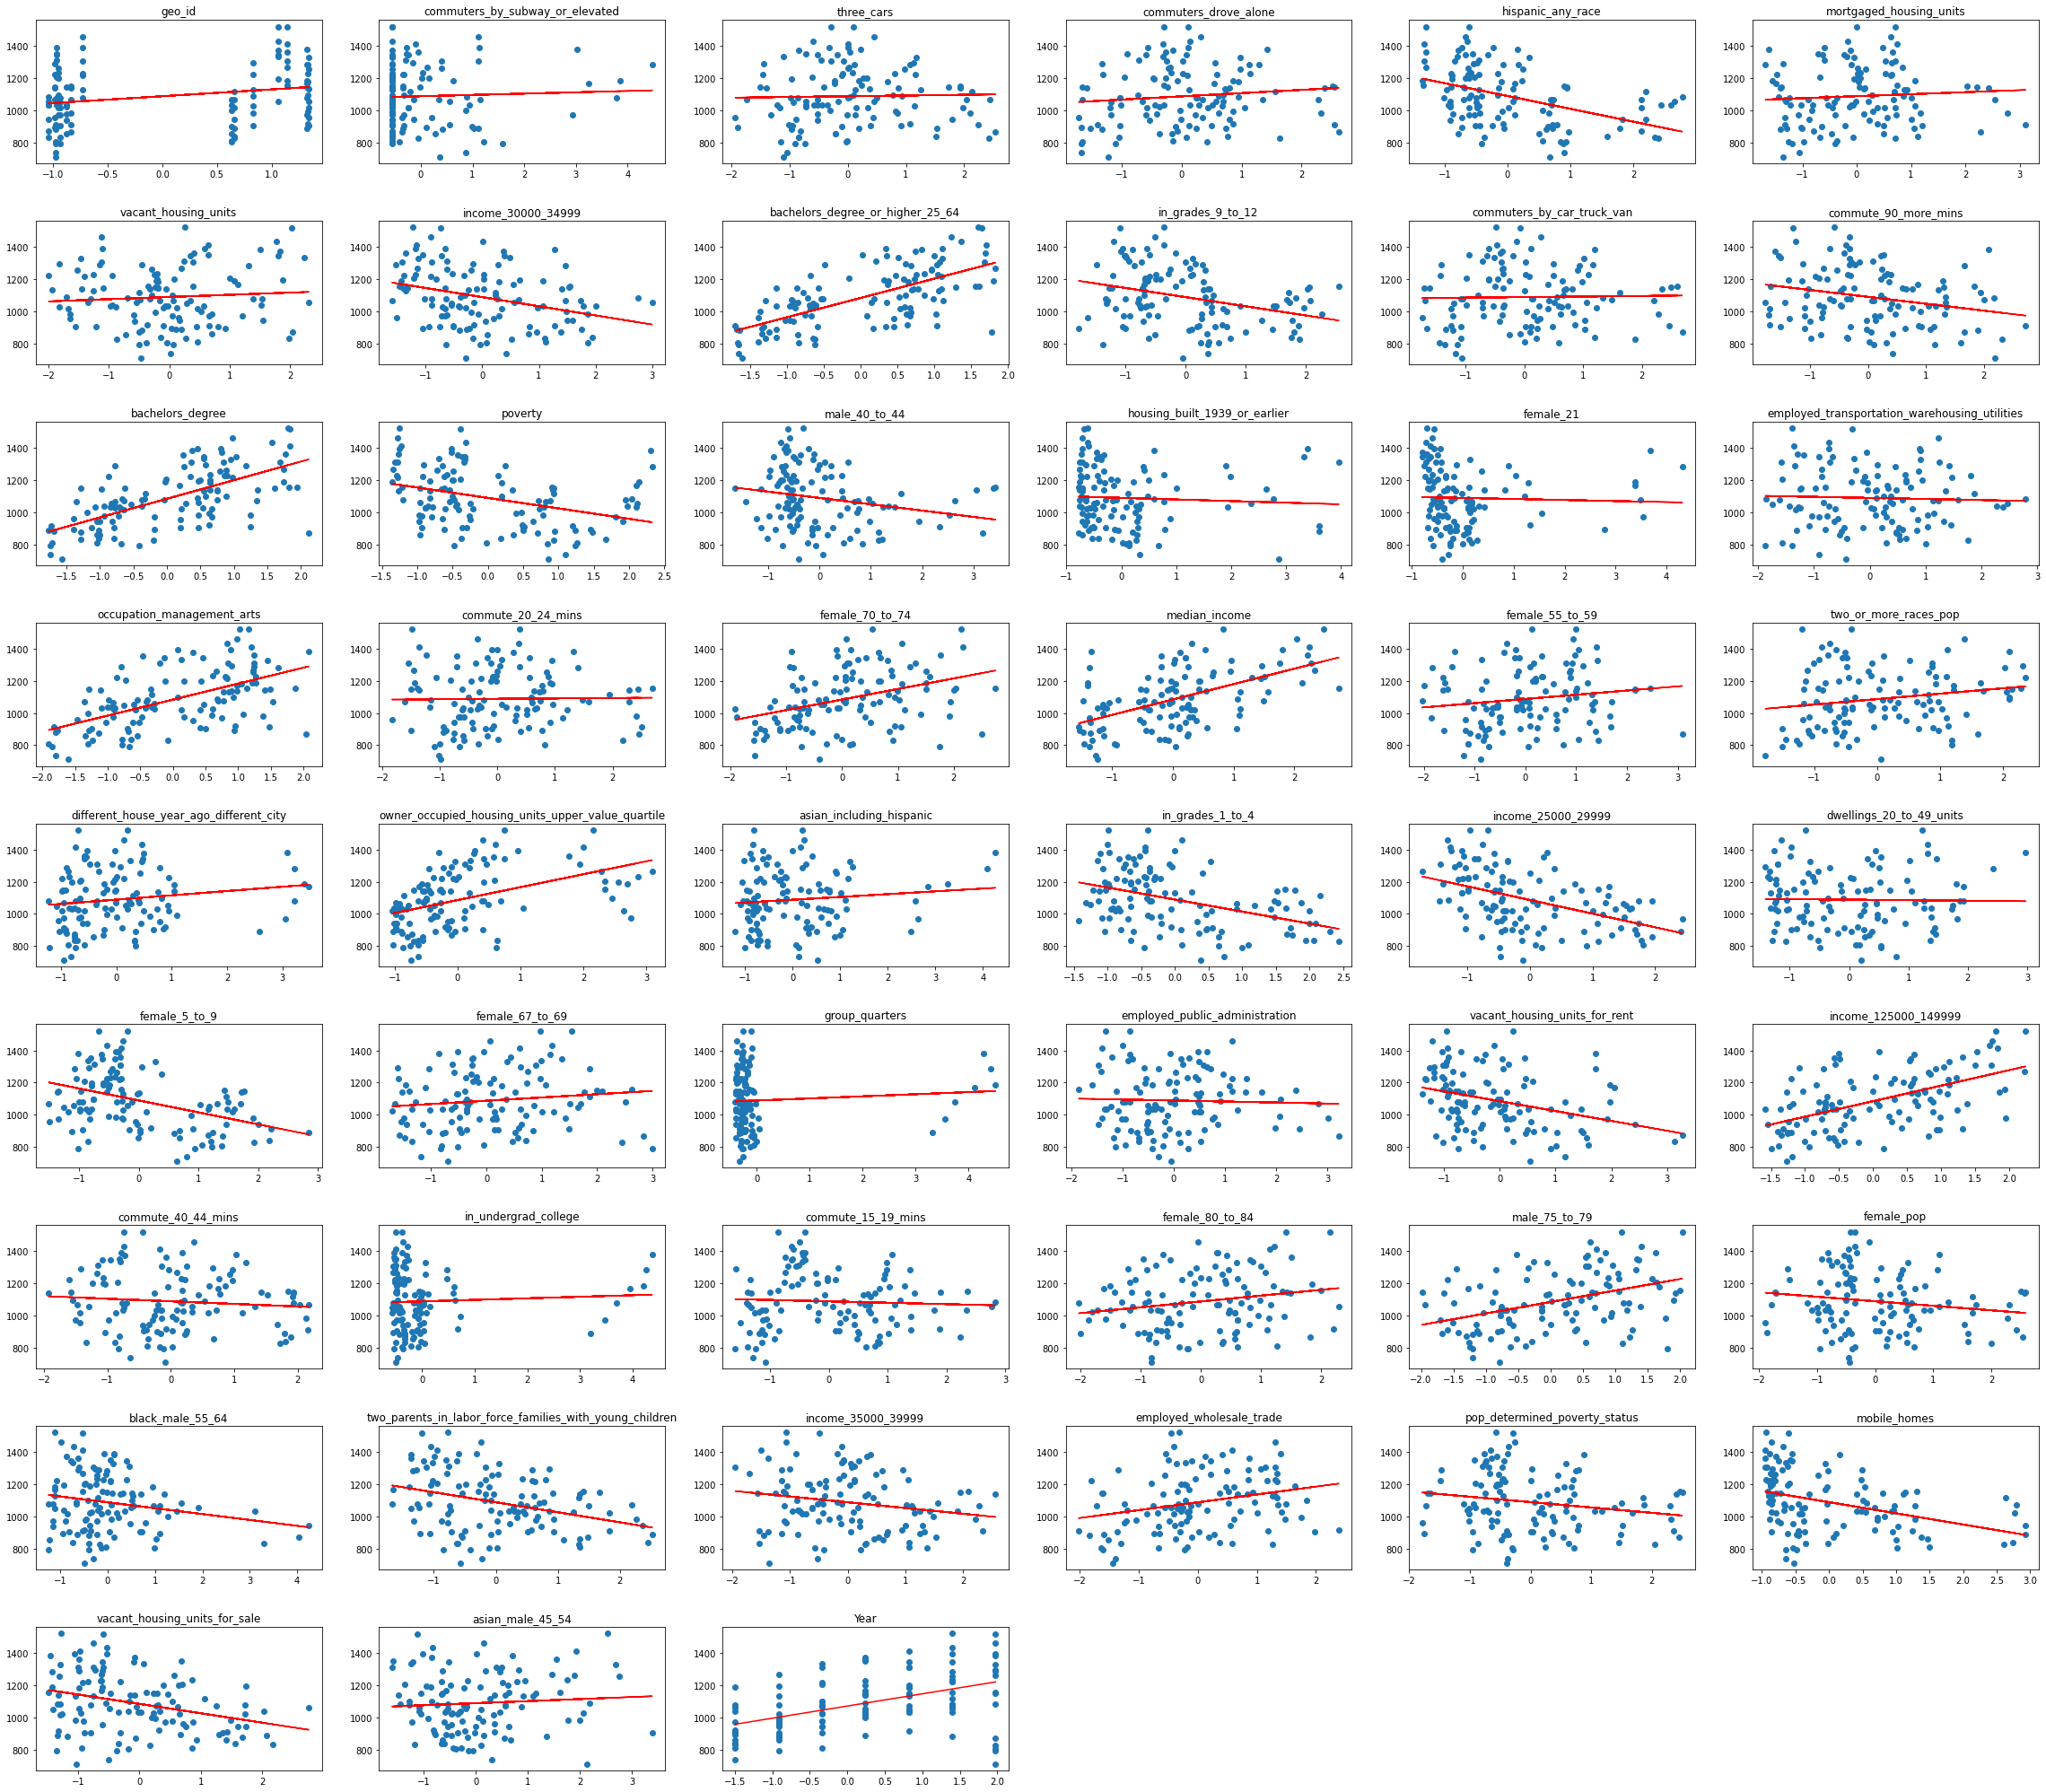

In [47]:
features_selected=[]
slope_threshold=40
first50_features=list(set(all_acs_features[0:49]+["Year","geo_id"]))
plot_XY_scatter(first50_features)

Missing values: 0


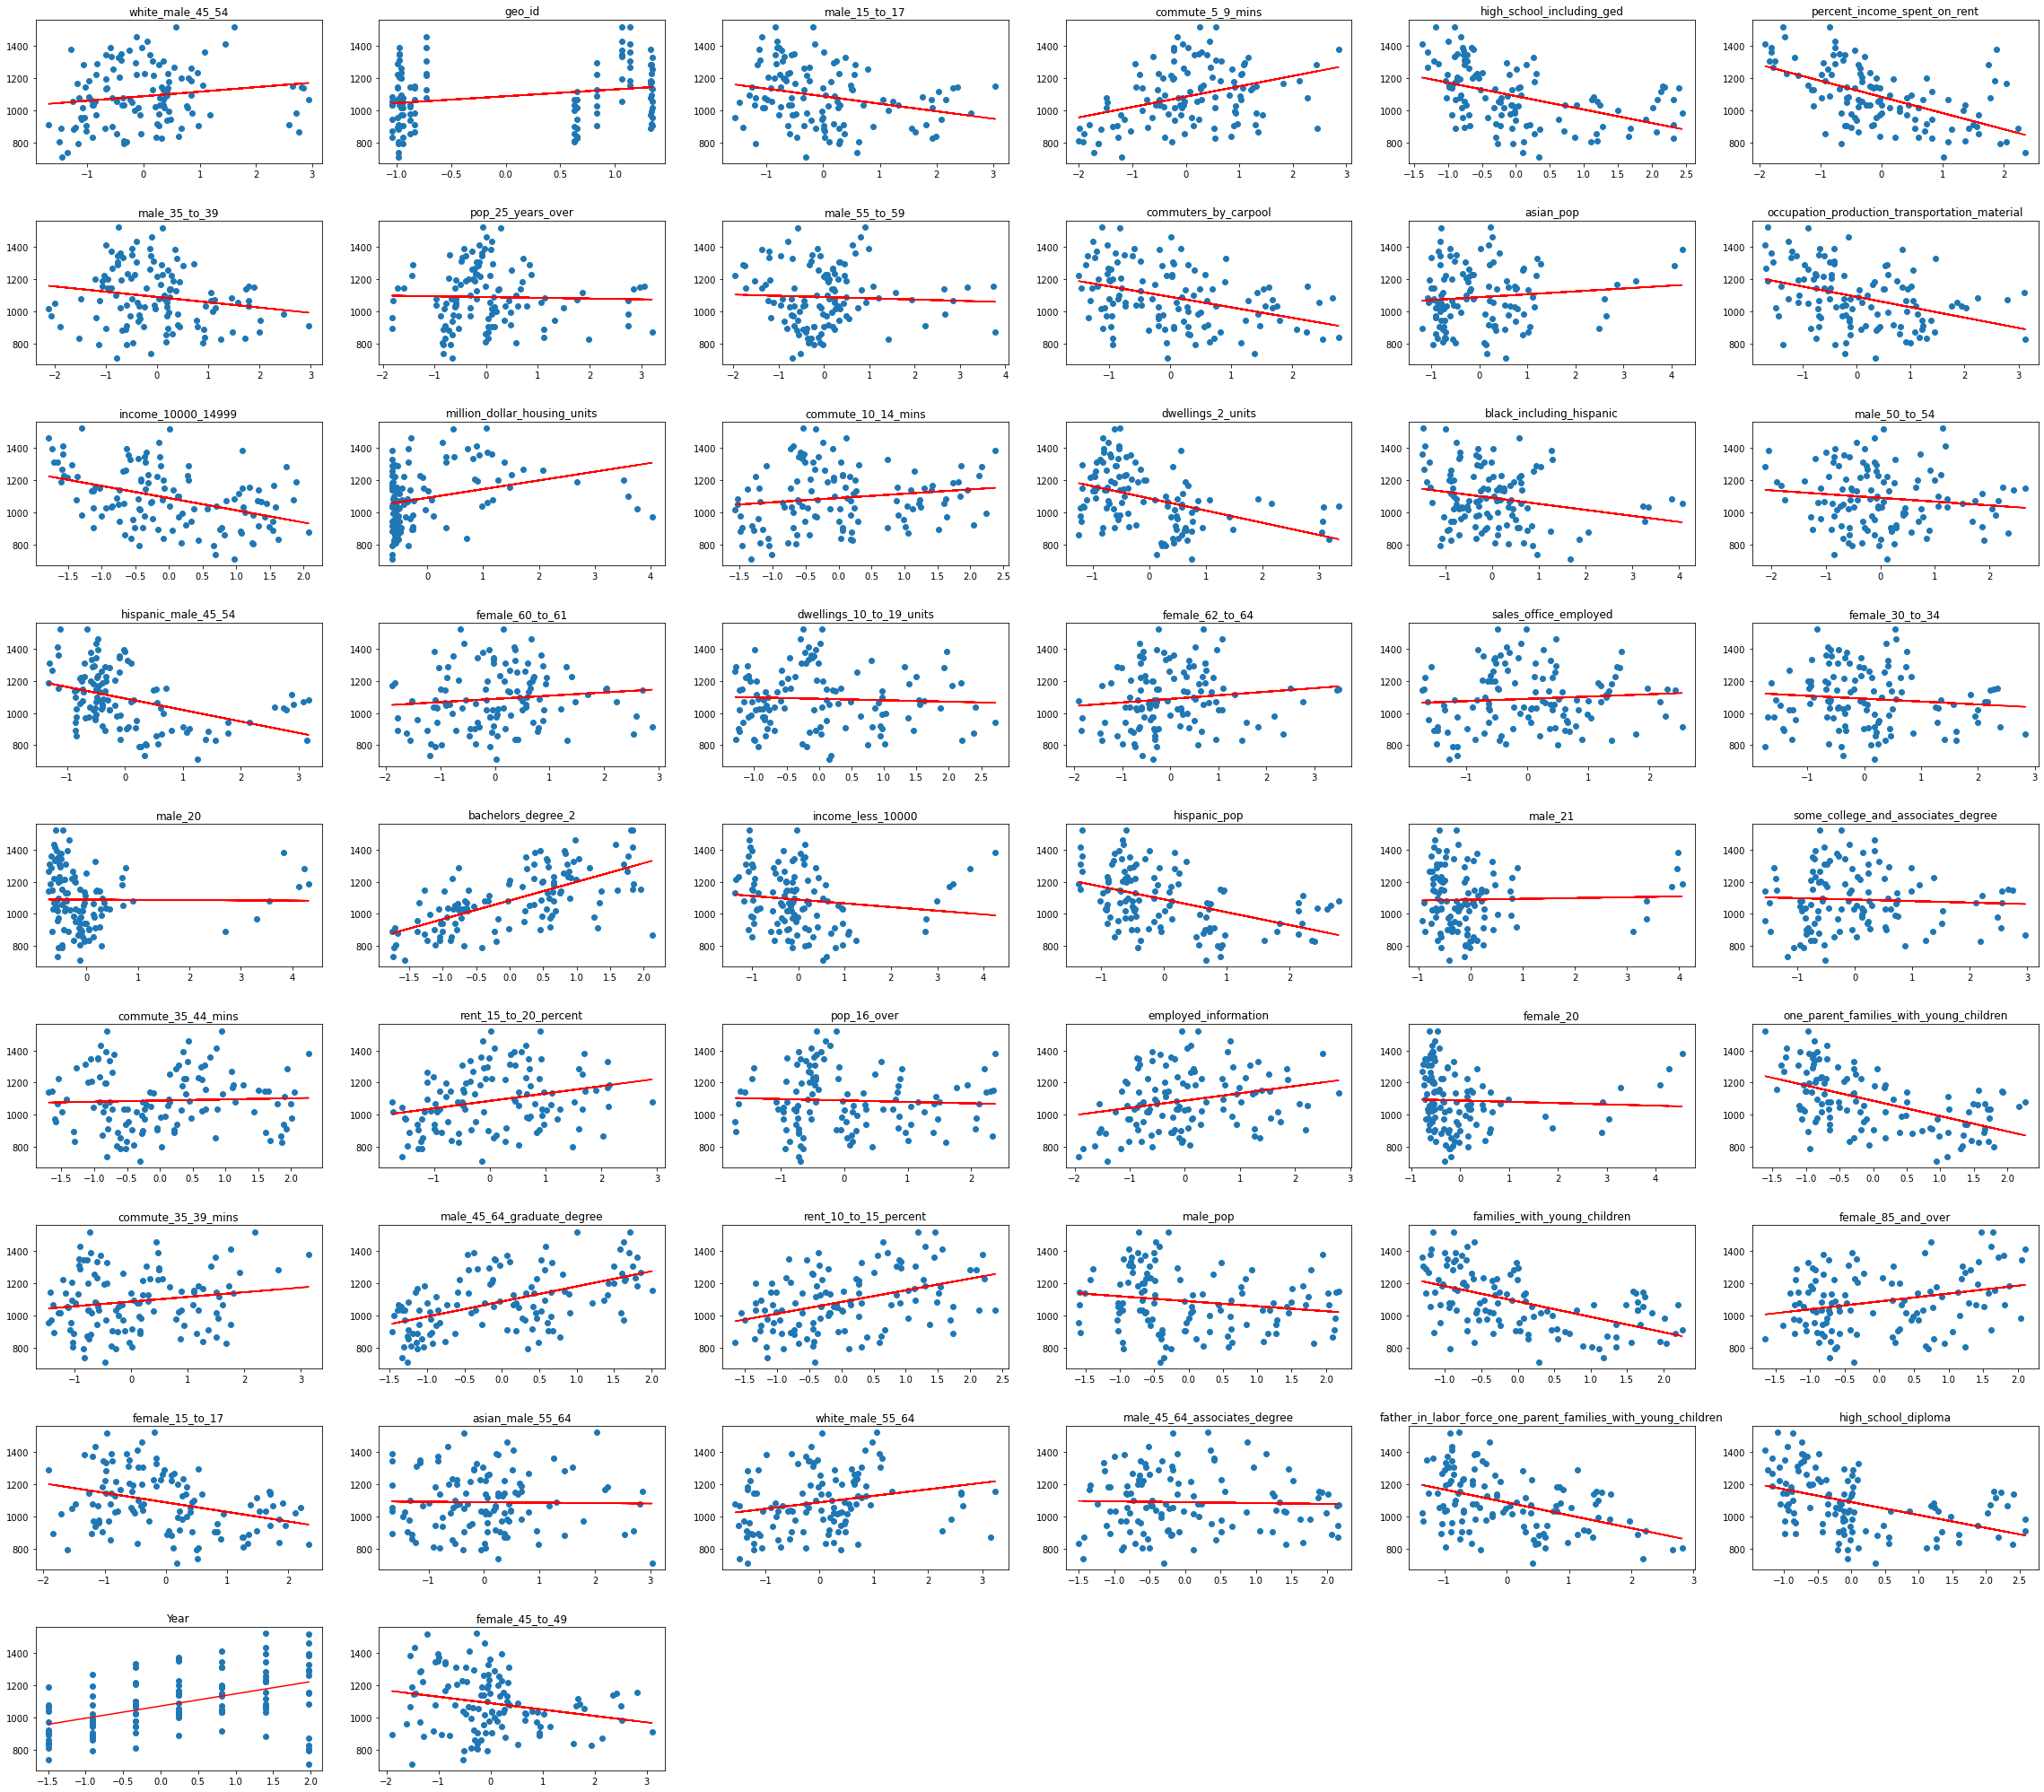

In [48]:
second50_features=list(set(all_acs_features[50:99]+["Year","geo_id"]))
plot_XY_scatter(second50_features)

Missing values: 0


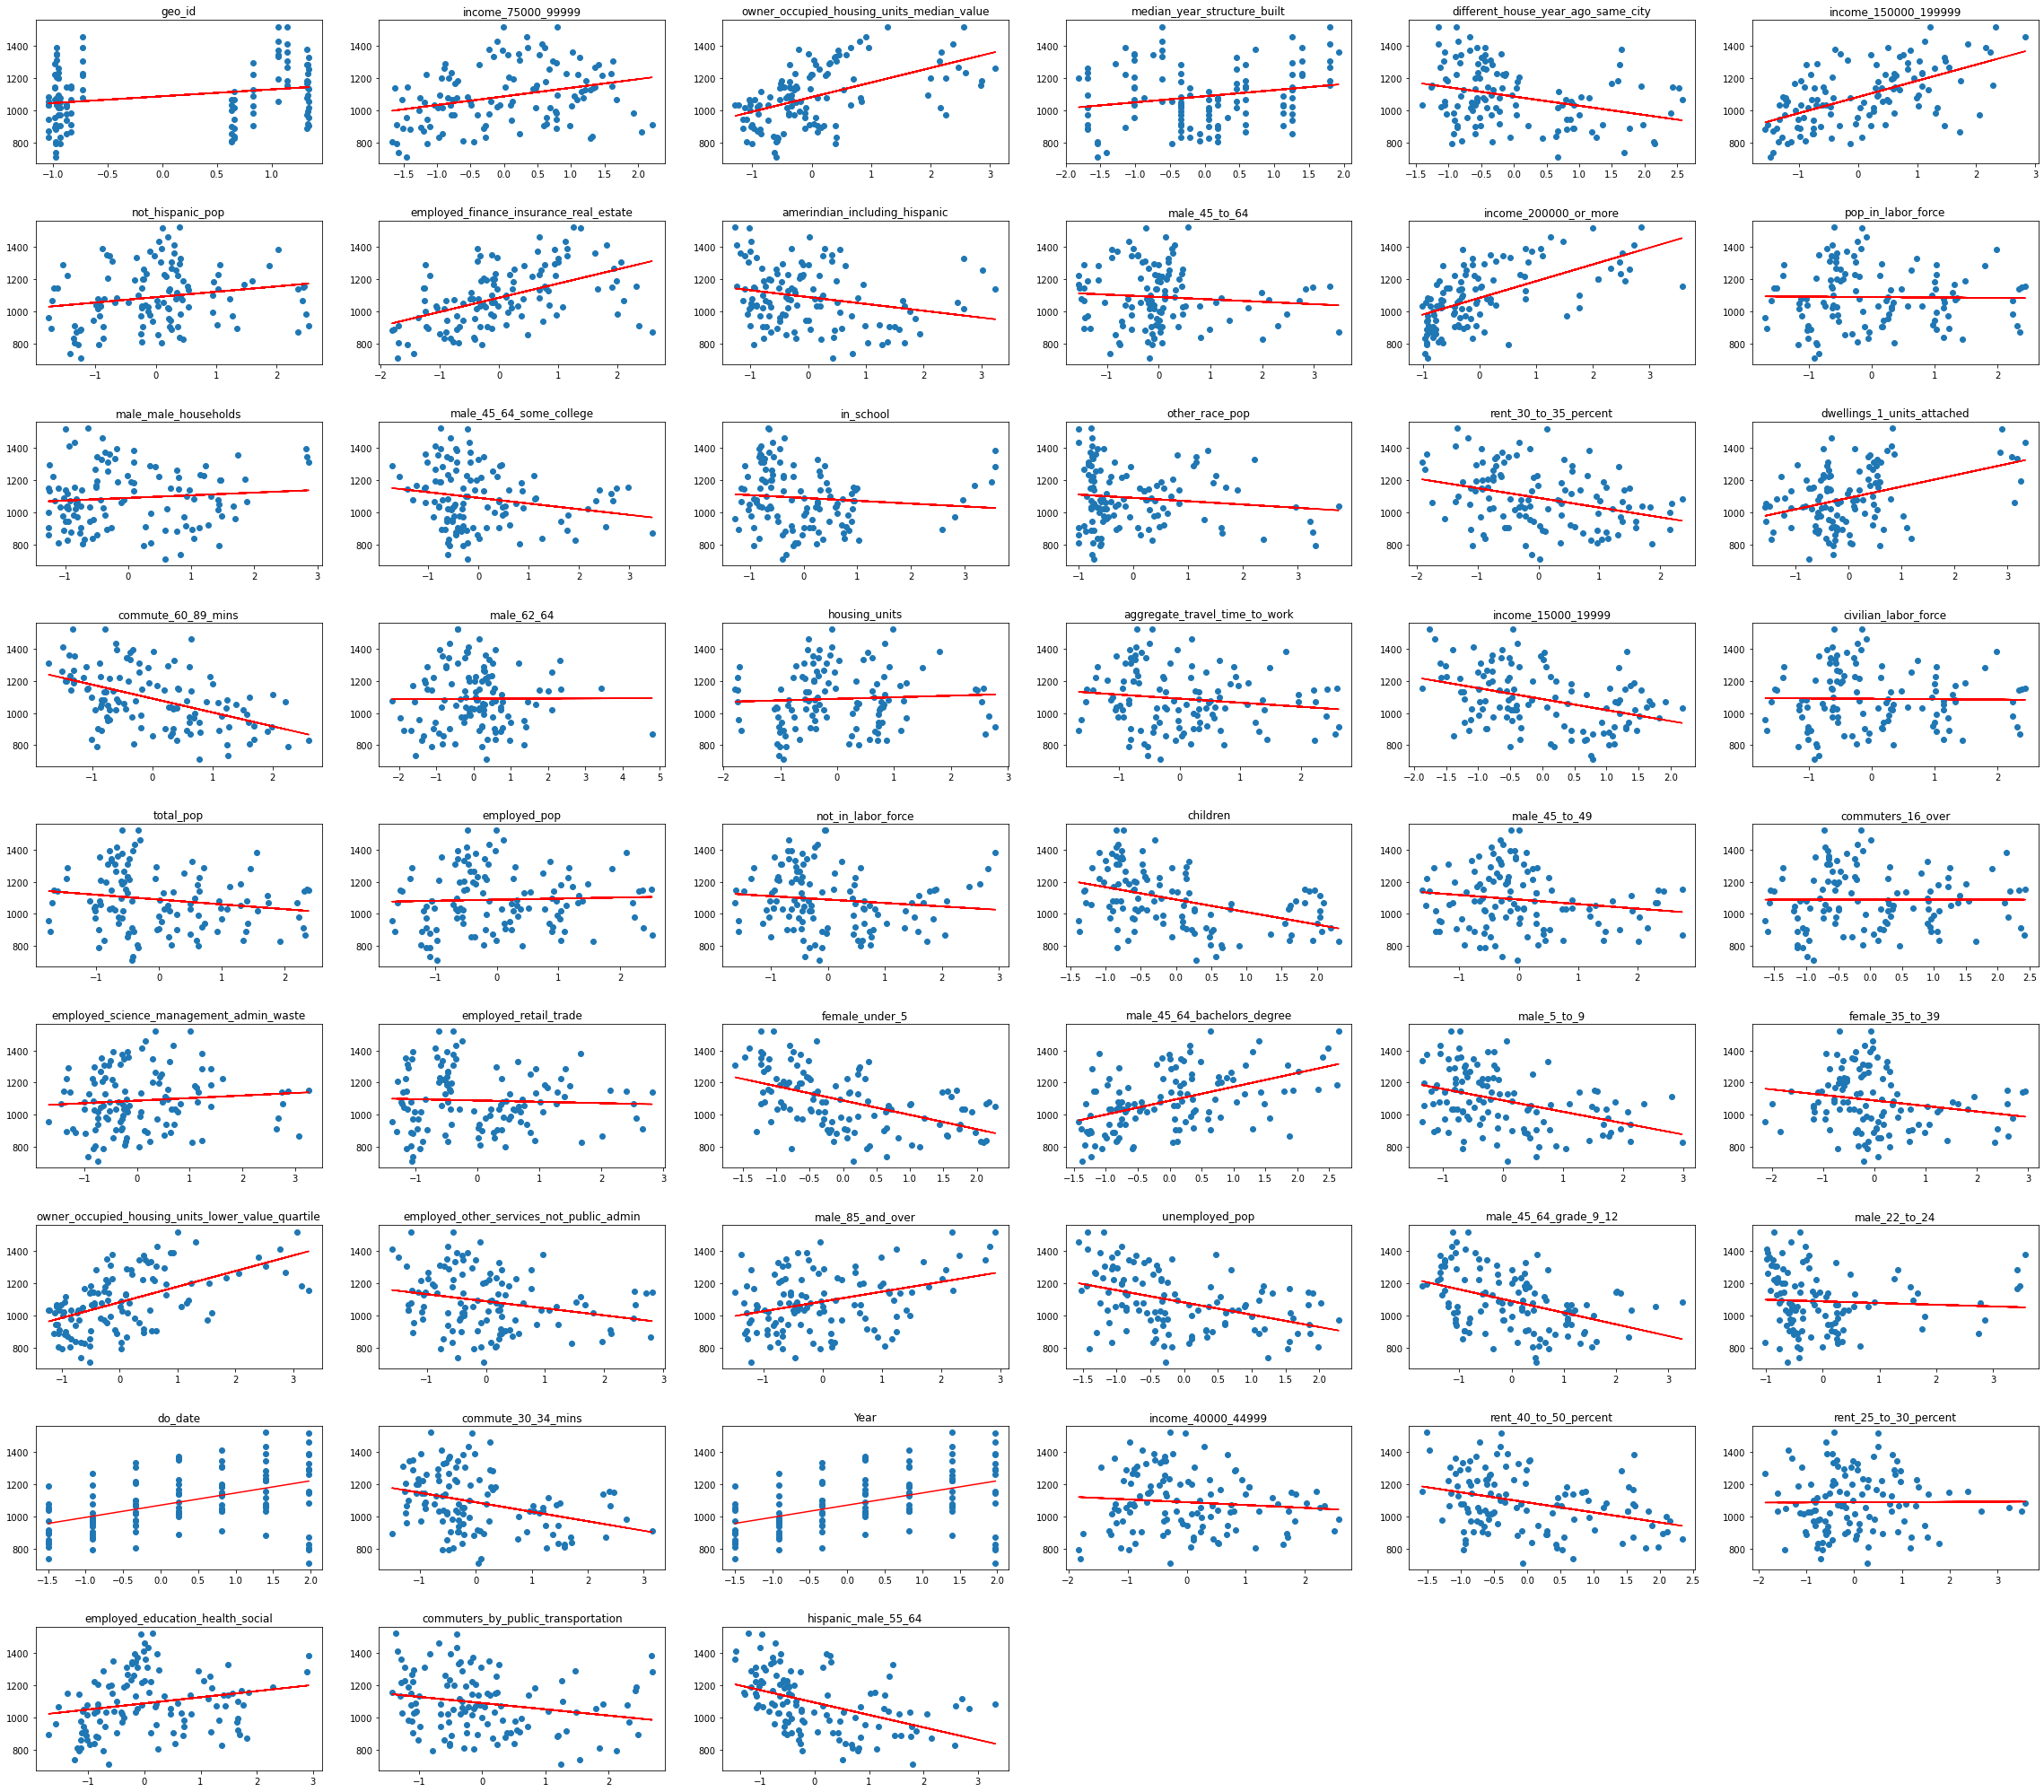

In [49]:
third50_features=list(set(all_acs_features[100:149]+["Year","geo_id"]))
plot_XY_scatter(third50_features)

Missing values: 0


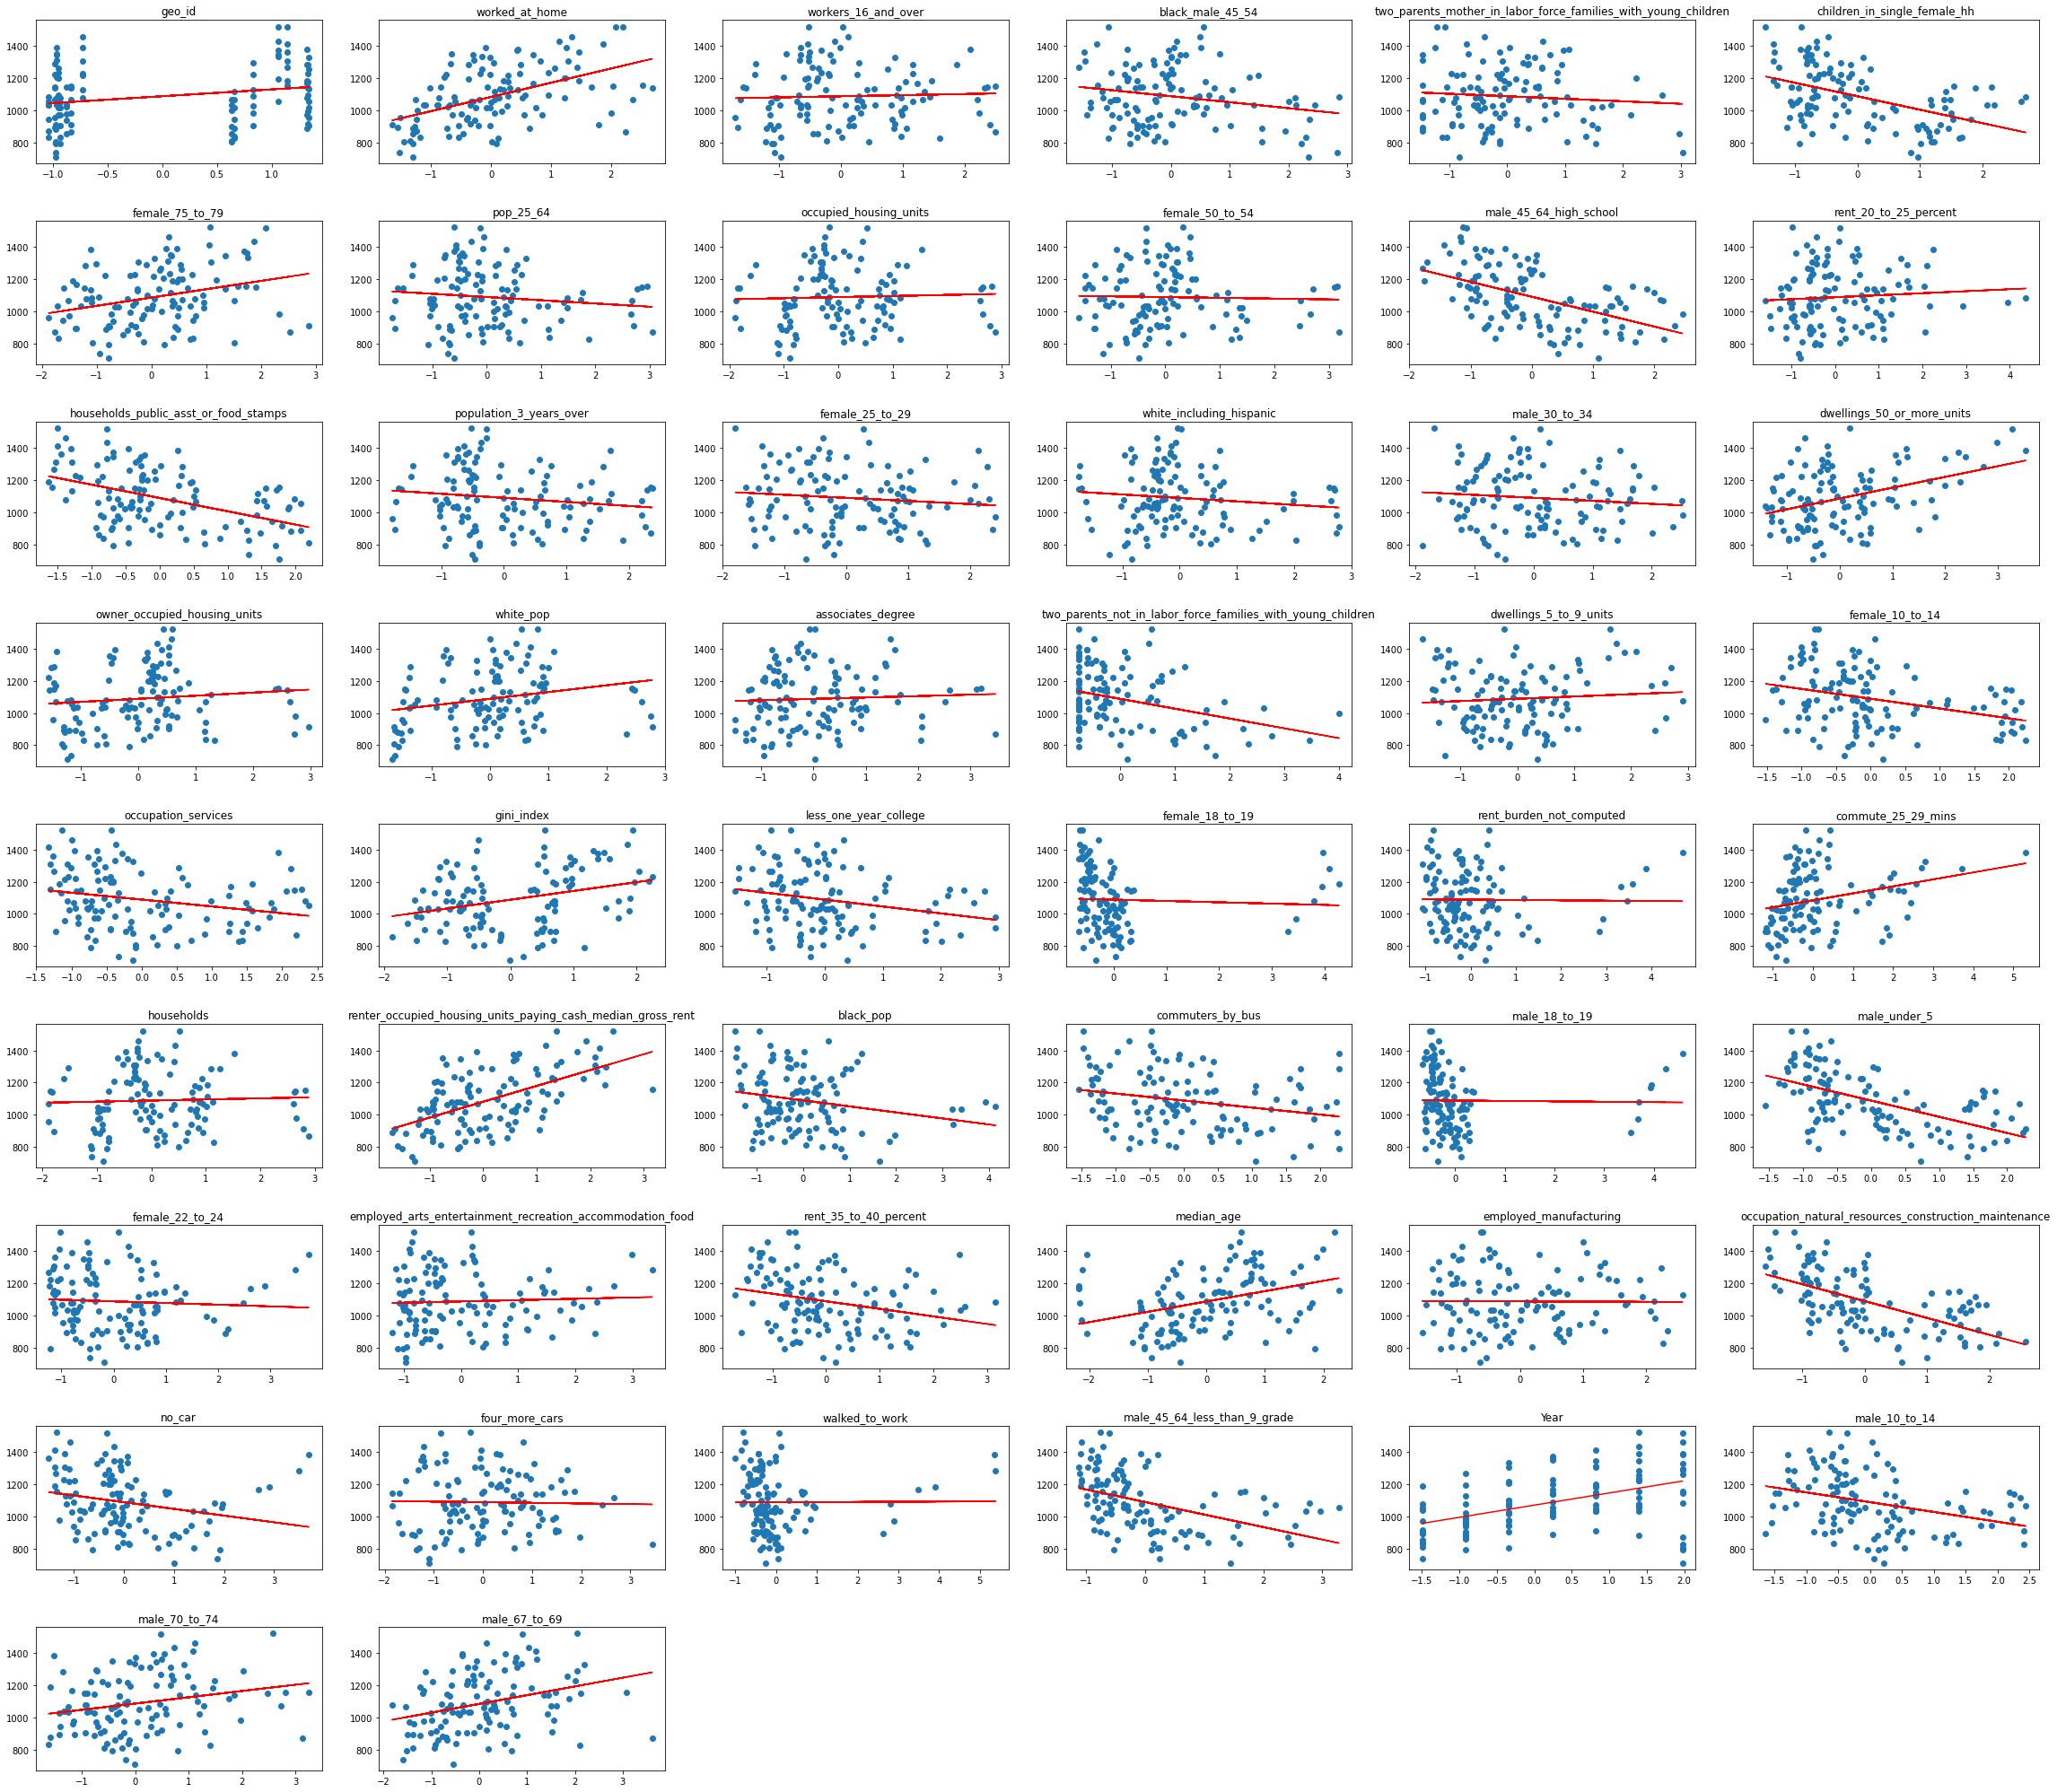

In [50]:
fourth50_features=list(set(all_acs_features[150:199]+["Year","geo_id"]))
plot_XY_scatter(fourth50_features)

Missing values: 0


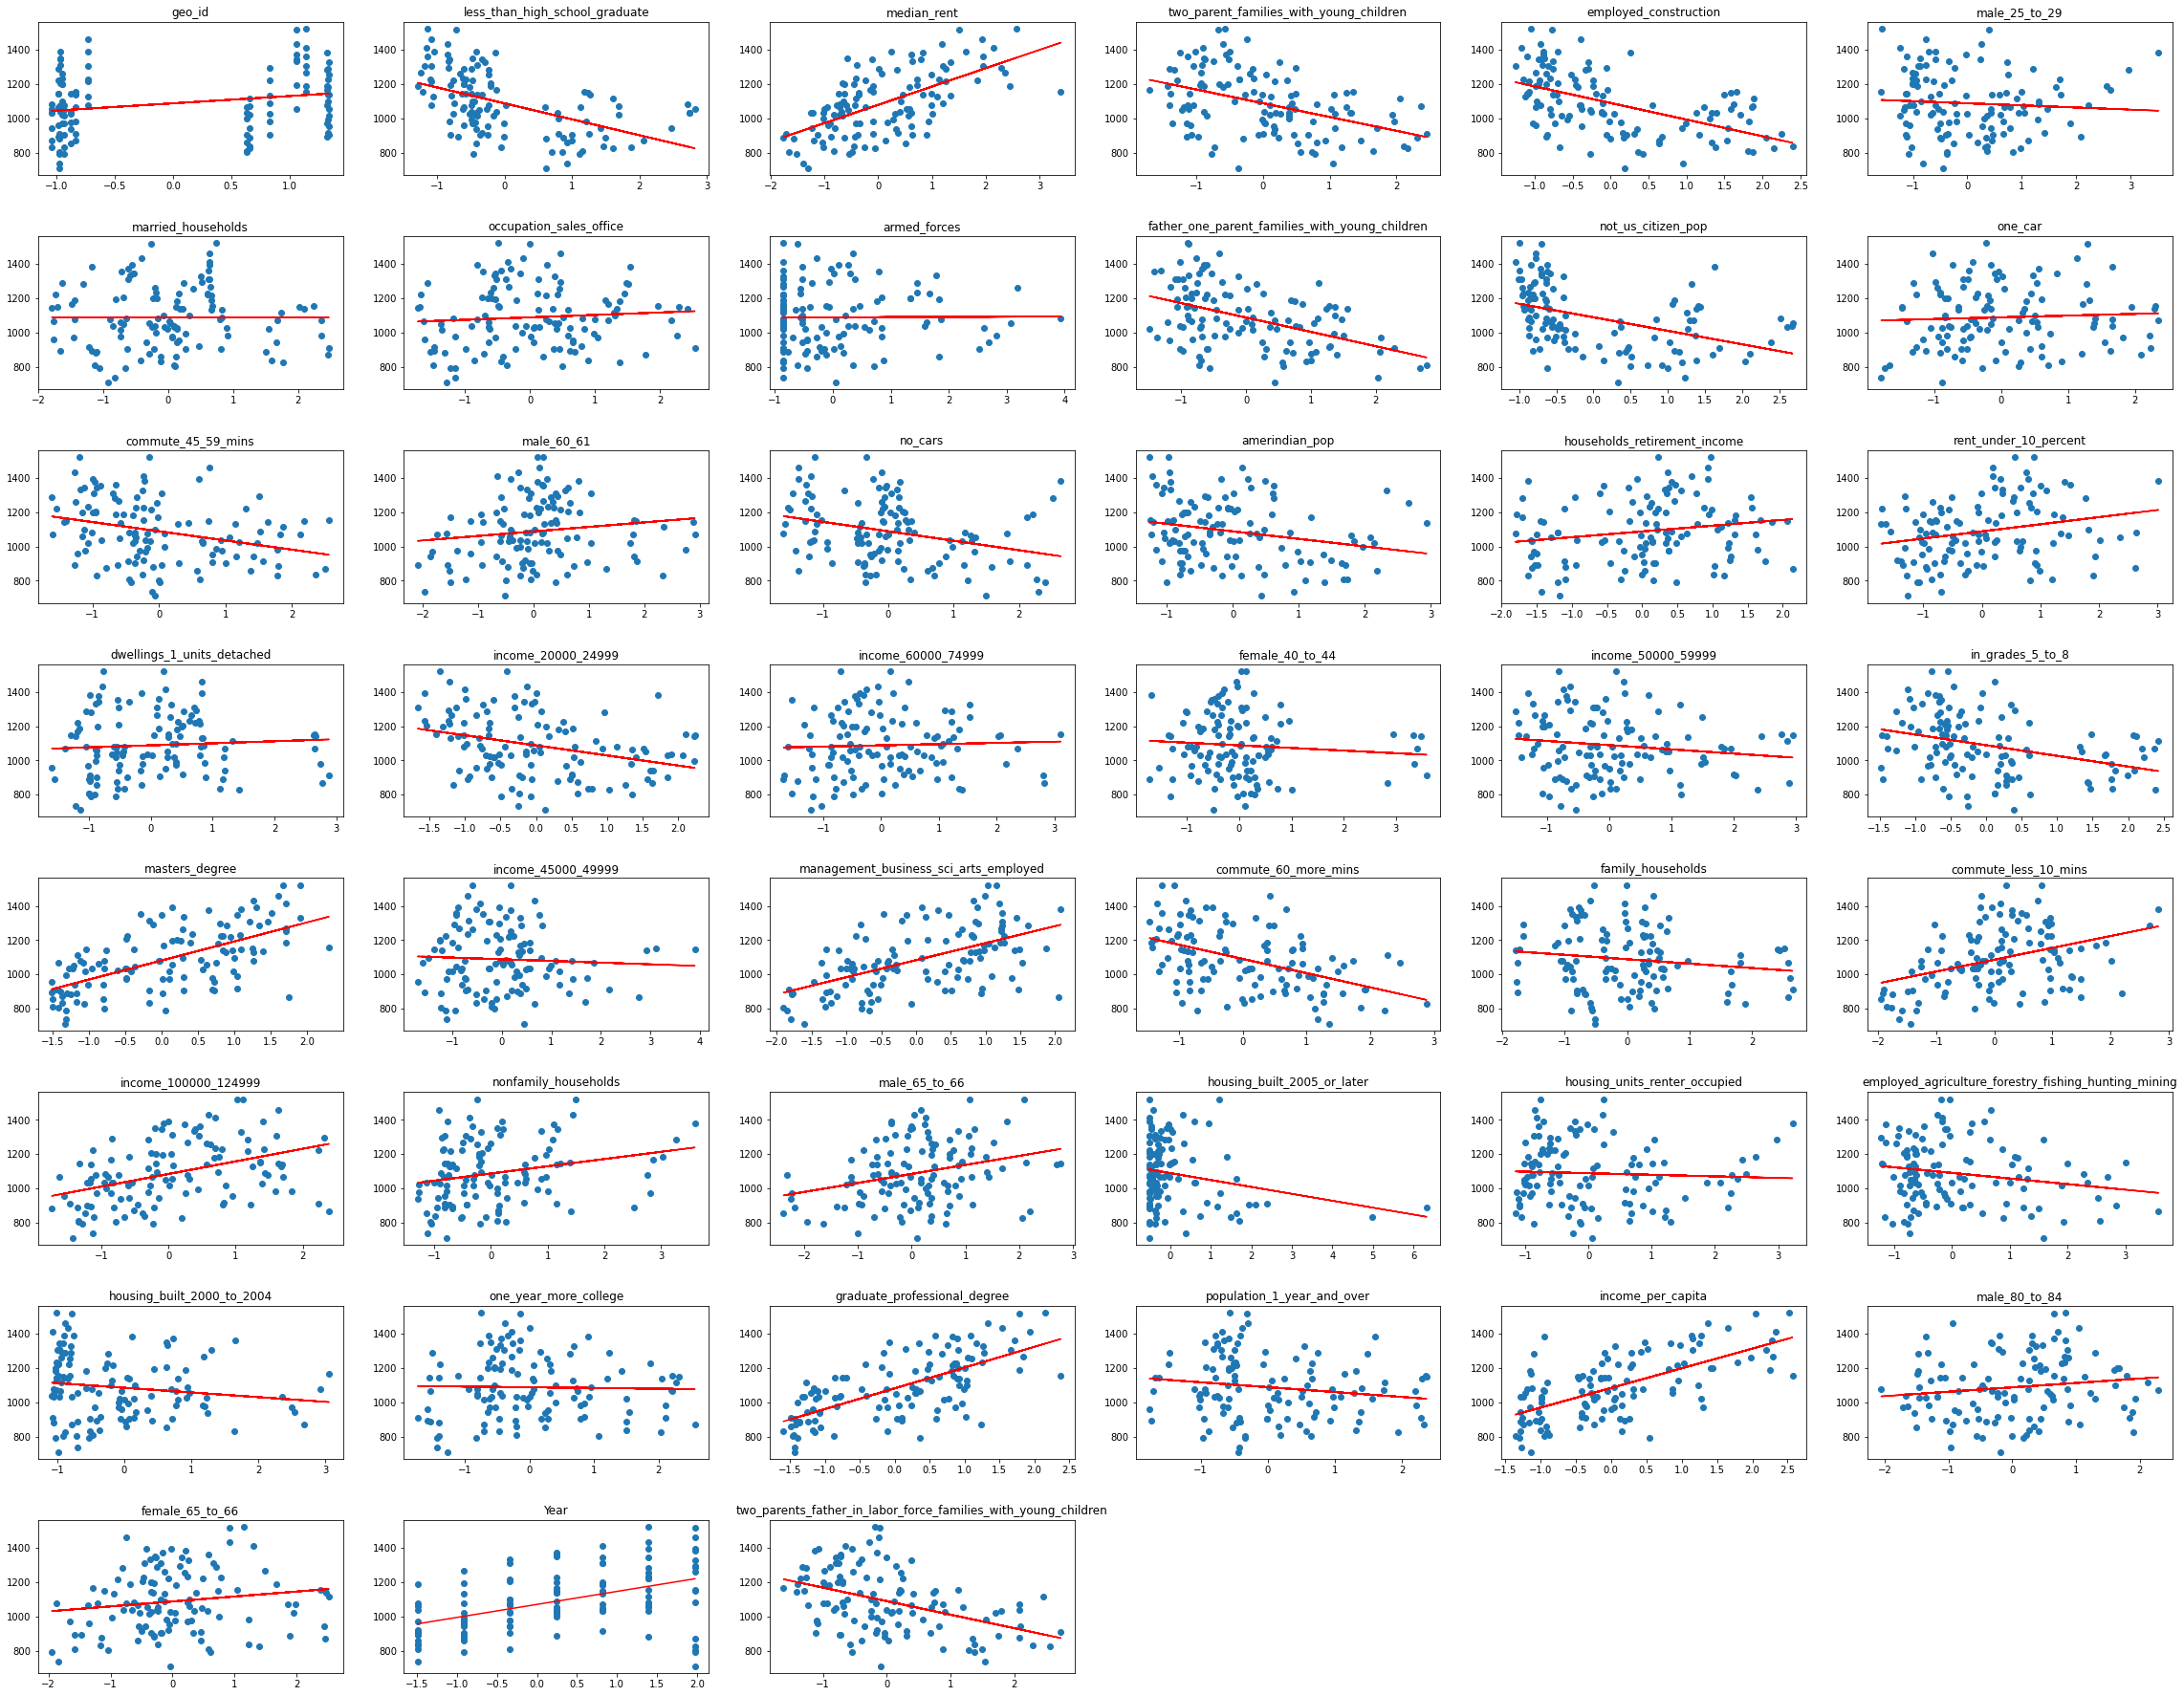

In [51]:
fifth50_features=list(set(all_acs_features[200:249]+["Year","geo_id"]))
plot_XY_scatter(fifth50_features)

In [149]:
#first pass Linear Regression based on slope analysis only
features_selected=list(set(features_selected))
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

lm = LinearRegression()

X1_train, X1_test, Y_train, Y_test = train_test_split(acs_new[features_selected].astype(float),y,test_size=0.2)
lm.fit(X1_train, Y_train)

print("Train Score: %.4f" % lm.score(X1_train, Y_train))
print("Test Score:  %.4f" % lm.score(X1_test, Y_test))

print(lm.score(X1_train, Y_train)- lm.score(X1_test, Y_test))

Train Score: 0.7450
Test Score:  0.6323
0.11271505721007236


In [151]:
features_selected

['hispanic_any_race',
 'income_30000_34999',
 'bachelors_degree_or_higher_25_64',
 'in_grades_9_to_12',
 'commute_90_more_mins',
 'bachelors_degree',
 'poverty',
 'occupation_management_arts',
 'female_70_to_74',
 'median_income',
 'owner_occupied_housing_units_upper_value_quartile',
 'in_grades_1_to_4',
 'income_25000_29999',
 'female_5_to_9',
 'vacant_housing_units_for_rent',
 'income_125000_149999',
 'male_75_to_79',
 'two_parents_in_labor_force_families_with_young_children',
 'employed_wholesale_trade',
 'mobile_homes',
 'vacant_housing_units_for_sale',
 'rent_15_to_20_percent',
 'employed_information',
 'one_parent_families_with_young_children',
 'male_45_64_graduate_degree',
 'rent_10_to_15_percent',
 'families_with_young_children',
 'female_85_and_over',
 'Year',
 'female_15_to_17',
 'white_male_55_64',
 'father_in_labor_force_one_parent_families_with_young_children',
 'high_school_diploma',
 'male_15_to_17',
 'commute_5_9_mins',
 'high_school_including_ged',
 'percent_income_sp